In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.regularizers import l1

In [ ]:
import math
import random

In [ ]:
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train = (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [ ]:
print(np.max(X_train))
print(np.min(X_train))

1.0
0.0


In [ ]:
adam = Adam(lr = 2e-4, beta_1 = 0.5)

In [ ]:
encoder = Sequential()
encoder.add(Dense(256, input_shape = (784, )))
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(128))
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(64))
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(32))
encoder.add(LeakyReLU(0.2))
encoder.compile(loss = "binary_crossentropy", optimizer = adam)
encoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)               

In [ ]:
decoder = Sequential()
decoder.add(Dense(64, input_shape = (32,)))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(128))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(256))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.compile(loss = 'binary_crossentropy', optimizer = adam)
decoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 784)              

In [ ]:
auto_input = Input(shape = (784,))
auto_code = encoder(auto_input)
auto_output = decoder(auto_code)

model = Model(auto_input, auto_output)
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [ ]:
train_imgs = X_train.reshape(-1,784)

In [ ]:
print(train_imgs.shape)

(60000, 784)


In [ ]:
model.fit(train_imgs, train_imgs, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1207
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1114
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1050
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1002
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0974
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0940
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0927


In [ ]:
def plot_imgs(X_test, samples = 10):
  test_imgs = random.sample(list(X_test), samples)
  test_imgs = np.array(test_imgs)
  print("Actual Images")
  plt.figure(figsize = (10,10))
  for i in range(samples):
     plt.subplot(10,10, i+1)
     plt.imshow(test_imgs[i], cmap='gray')
     plt.axis('off')
  plt.tight_layout()
  plt.show()

  print("Predicted")
  test_imgs = test_imgs.reshape(test_imgs.shape[0], 784)
  # print(test_imgs.shape)
  to_test = np.reshape(test_imgs, [test_imgs.shape[0], test_imgs[0].shape[0]])
  pred = model.predict(to_test)
  pred_imgs = pred.reshape(pred.shape[0],28,28)
  # print()
  plt.figure(figsize = (10,10))
  for i in range(samples):
     plt.subplot(10,10, i+1)
     plt.imshow(pred_imgs[i], cmap='gray')
     plt.axis('off')
  plt.tight_layout()
  plt.show()

Actual Images


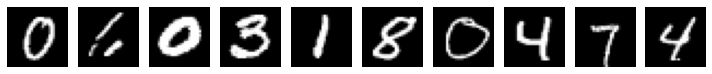

Predicted


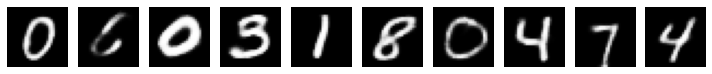

In [ ]:
plot_imgs(X_test)

In [ ]:
noise_train = np.random.normal(-1,1,(X_train.shape))
noise_factor = 0.07
noisy_X_train = X_train + noise_factor*noise_train
noise_test = np.random.normal(-1,1,(X_test.shape))
noisy_X_test = X_test + noise_factor*noise_test

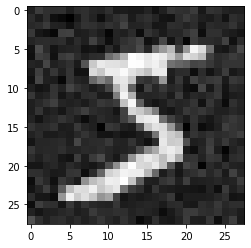

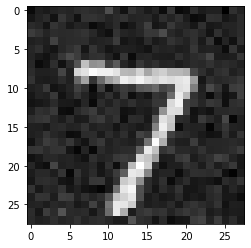

In [ ]:
#5 Percent noise
plt.imshow(noisy_X_train[0], cmap = 'gray')
plt.show()
plt.imshow(noisy_X_test[0], cmap = 'gray')
plt.show()

In [ ]:
print(noisy_X_train.shape)
print(noisy_X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
encoder = Sequential()
encoder.add(Dense(256, input_shape = (784, )))
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(128))
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(64))
encoder.add(LeakyReLU(0.2))
encoder.add(Dense(32, activity_regularizer=l1(10e-6)))
encoder.add(LeakyReLU(0.2))
encoder.compile(loss = "binary_crossentropy", optimizer = adam)
encoder.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_67 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 32)              

In [ ]:
decoder = Sequential()
decoder.add(Dense(64, input_shape = (32,)))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(128))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(256))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(784, activation = 'sigmoid'))
decoder.compile(loss = 'binary_crossentropy', optimizer = adam)
decoder.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_70 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_71 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_72 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 784)             

In [ ]:
auto_input = Input(shape = (784,))
auto_code = encoder(auto_input)
auto_output = decoder(auto_code)

model = Model(auto_input, auto_output)
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [ ]:
train_imgs = noisy_X_train.reshape(-1, 784)
real_imgs = X_train.reshape(-1, 784)
print(train_imgs.shape)
print(real_imgs.shape)

(60000, 784)
(60000, 784)


In [ ]:
model.fit(train_imgs, real_imgs, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1787
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0938
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0921
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0895


Actual Images


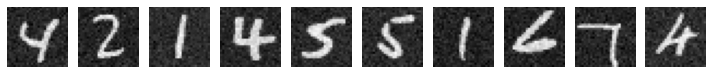

Predicted


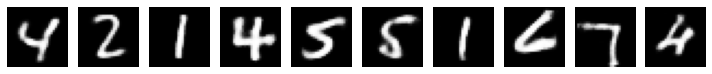

In [ ]:
plot_imgs(noisy_X_test)